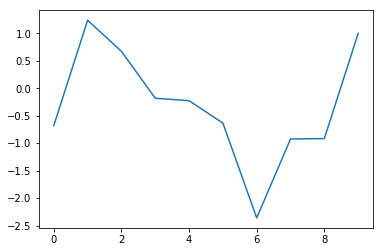

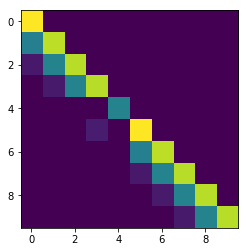

/home/albert/miniconda3/envs/bayes_filter/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: covariance is not symmetric positive-semidefinite.


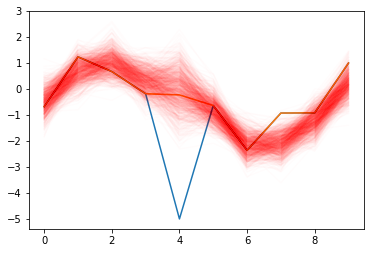

In [24]:
import tensorflow_probability as tfp
import tensorflow as tf
import pylab as plt
import numpy as np

with tf.Session() as sess:
    kern = tfp.positive_semidefinite_kernels.ExponentiatedQuadratic()
    X = tf.linspace(0.,10., 10)[:,None]
    
    K = kern.matrix(X,X)
    z = np.random.multivariate_normal(np.zeros(10), cov=sess.run(K))
    z_pert = z.copy()
    z_pert[4] = -5.
    plt.plot(z)
    plt.show()
    sigma = 0.5*np.ones(10)
    sigma[4] = np.inf
    K_pert = K / sigma[:,None]/sigma[None,:] + np.eye(10)
    L = tf.linalg.cholesky(K_pert)
    plt.imshow(sess.run(L))
    plt.show()
    A = tf.linalg.triangular_solve(L, K/sigma[:, None])
    post_mean = sess.run(tf.matmul(A, tf.cast(z_pert, tf.float32)[:,None],transpose_a=True))[:,0]
    post_cov = sess.run(K - tf.matmul(A,A, transpose_a=True))
    plt.plot(z_pert)
    plt.plot(z)
    z_post = np.random.multivariate_normal(post_mean, post_cov,size=1000)
    plt.plot(z_post.T,alpha=0.01,c='red')
    plt.show()
    

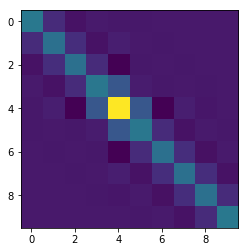

In [25]:
plt.imshow(post_cov)
plt.show()

In [27]:

print(np.sqrt(np.inf))


inf
